# SPP Locational Marginal Prices

In [2]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd

from ad_hoc_da.constants import DATA_DIR, OUTPUT_DIR, TEMP_DIR, create_dirs

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 300)

create_dirs()

In [3]:
# load spp_lmp_da_hr_hubs_2025.csv
date_columns = [
    "UTC Timestamp (Interval Ending)",
    "Local Timestamp Central Time (Interval Beginning)",
    "Local Timestamp Central Time (Interval Ending)",
    "Local Date",
]
df = pd.read_csv(
    DATA_DIR / "spp_lmp_da_hr_hubs_2025.csv", header=3, parse_dates=date_columns
)
df.head()

,UTC Timestamp (Interval Ending),Local Timestamp Central Time (Interval Beginning),Local Timestamp Central Time (Interval Ending),Local Date,Hour Number,North Hub LMP,South Hub LMP,North Hub (Congestion),South Hub (Congestion),North Hub (Energy),South Hub (Energy),North Hub (Loss),South Hub (Loss)
0,2025-01-01 07:00:00,2025-01-01 00:00:00,2025-01-01 01:00:00,2025-01-01,1,17.6879,27.8403,-5.4801,3.0533,24.3462,24.3462,-1.1782,0.4408
1,2025-01-01 08:00:00,2025-01-01 01:00:00,2025-01-01 02:00:00,2025-01-01,2,17.8741,25.6212,-4.4026,1.7873,23.4182,23.4183,-1.1415,0.4156
2,2025-01-01 09:00:00,2025-01-01 02:00:00,2025-01-01 03:00:00,2025-01-01,3,18.8635,26.8891,-4.5842,1.6784,24.7030,24.7030,-1.2553,0.5077
3,2025-01-01 10:00:00,2025-01-01 03:00:00,2025-01-01 04:00:00,2025-01-01,4,20.7078,28.6298,-4.5119,1.5235,26.5187,26.5188,-1.2990,0.5875
4,2025-01-01 11:00:00,2025-01-01 04:00:00,2025-01-01 05:00:00,2025-01-01,5,23.7647,29.6792,-2.8695,1.1953,27.8167,27.8167,-1.1825,0.6672


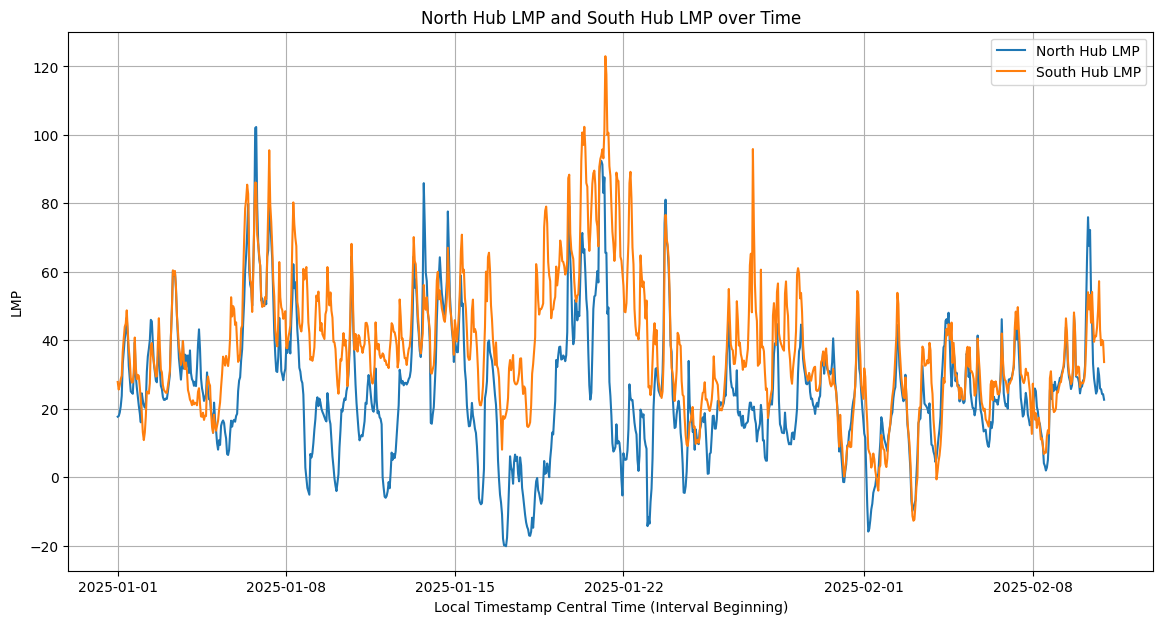

In [4]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(
    df["Local Timestamp Central Time (Interval Beginning)"],
    df["North Hub LMP"],
    label="North Hub LMP",
)
ax.plot(
    df["Local Timestamp Central Time (Interval Beginning)"],
    df["South Hub LMP"],
    label="South Hub LMP",
)
ax.set_xlabel("Local Timestamp Central Time (Interval Beginning)")
ax.set_ylabel("LMP")
ax.set_title("North Hub LMP and South Hub LMP over Time")
ax.legend()
ax.grid(True)
plt.show()

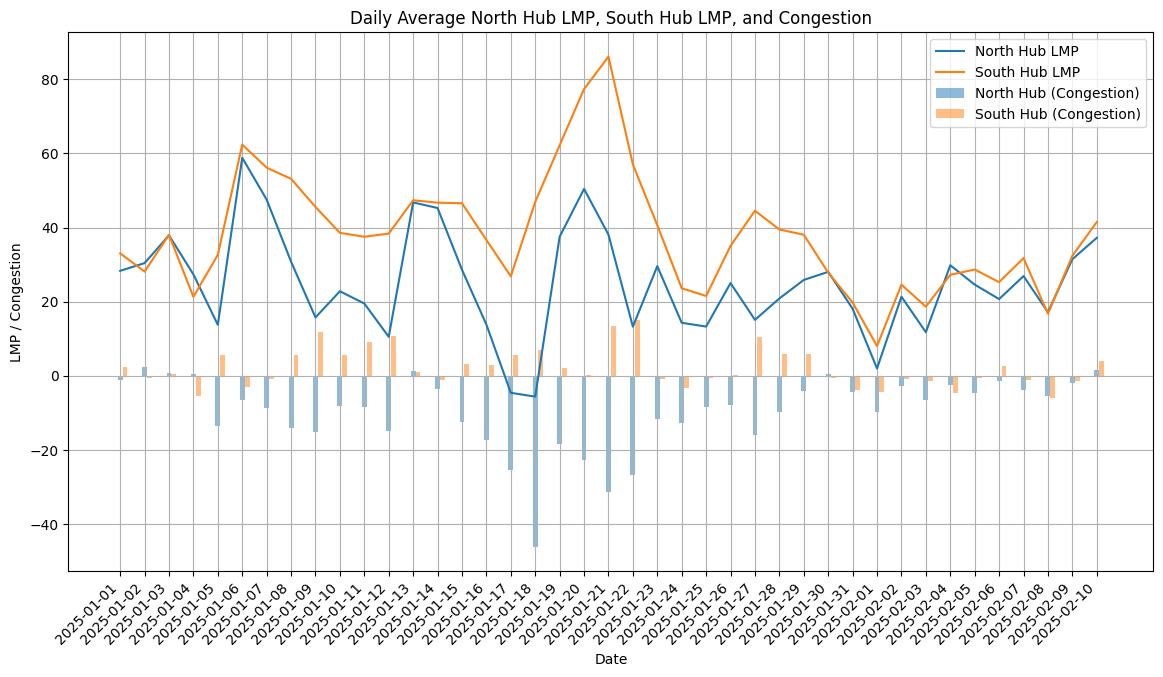

In [5]:
# Resample the data by day and calculate the mean for each day
df_daily = df.resample('D', on='Local Date').mean()

fig, ax = plt.subplots(figsize=(14, 7))

# Plot North Hub LMP and South Hub LMP as lines
ax.plot(
    df_daily.index,
    df_daily["North Hub LMP"],
    label="North Hub LMP",
)
ax.plot(
    df_daily.index,
    df_daily["South Hub LMP"],
    label="South Hub LMP",
)

# Plot North Hub (Congestion) and South Hub (Congestion) as bars
ax.bar(
    df_daily.index,
    df_daily["North Hub (Congestion)"],
    width=0.2,
    align='center',
    alpha=0.5,
    label="North Hub (Congestion)"
)
ax.bar(
    df_daily.index + pd.Timedelta(days=0.2),
    df_daily["South Hub (Congestion)"],
    width=0.2,
    align='center',
    alpha=0.5,
    label="South Hub (Congestion)"
)

ax.set_xlabel("Date")
ax.set_ylabel("LMP / Congestion")
ax.set_title("Daily Average North Hub LMP, South Hub LMP, and Congestion")
ax.legend()
ax.grid(True)

# Set x-ticks to show every date
ax.set_xticks(df_daily.index)
ax.set_xticklabels(df_daily.index.strftime('%Y-%m-%d'), rotation=45, ha='right')

plt.show()

In [6]:
north_corr = df_daily["North Hub (Congestion)"].corr(df_daily["North Hub LMP"])
south_corr = df_daily["South Hub (Congestion)"].corr(df_daily["South Hub LMP"])

print(f"Correlation between North Hub (Congestion) and North Hub LMP: {north_corr}")
print(f"Correlation between South Hub (Congestion) and South Hub LMP: {south_corr}")

Correlation between North Hub (Congestion) and North Hub LMP: 0.38849833259658095
Correlation between South Hub (Congestion) and South Hub LMP: 0.5068191491533384


In [7]:
# Load spp_lmp_da_hr_interfaces_2025.csv
df_interfaces = pd.read_csv(
    DATA_DIR / "spp_lmp_da_hr_interfaces_2025.csv", header=3, parse_dates=date_columns
)
df_interfaces.head()

,UTC Timestamp (Interval Ending),Local Timestamp Central Time (Interval Beginning),Local Timestamp Central Time (Interval Ending),Local Date,Hour Number,"Associated Electric Cooperative, Inc. LMP",Blackwater DC Tie LMP,Eddy DC Tie LMP,Lamar LMP,Midcontinent Independent System Operator LMP,Miles City DC Tie LMP,Oklaunion / ERCOT North DC Tie LMP,Rapid City DC Tie LMP,Saskatchewan Power Co. LMP,Southwestern Power Administration LMP,Stegall LMP,Sydney DC Tie LMP,Tennessee Valley Authority LMP,Welch / ERCOT East DC Tie LMP,"Associated Electric Cooperative, Inc. (Congestion)",Blackwater DC Tie (Congestion),Eddy DC Tie (Congestion),Lamar (Congestion),Midcontinent Independent System Operator (Congestion),Miles City DC Tie (Congestion),Oklaunion / ERCOT North DC Tie (Congestion),Rapid City DC Tie (Congestion),Saskatchewan Power Co. (Congestion),Southwestern Power Administration (Congestion),Stegall (Congestion),Sydney DC Tie (Congestion),Tennessee Valley Authority (Congestion),Welch / ERCOT East DC Tie (Congestion),"Associated Electric Cooperative, Inc. (Energy)",Blackwater DC Tie (Energy),Eddy DC Tie (Energy),Lamar (Energy),Midcontinent Independent System Operator (Energy),Miles City DC Tie (Energy),Oklaunion / ERCOT North DC Tie (Energy),Rapid City DC Tie (Energy),Saskatchewan Power Co. (Energy),Southwestern Power Administration (Energy),Stegall (Energy),Sydney DC Tie (Energy),Tennessee Valley Authority (Energy),Welch / ERCOT East DC Tie (Energy),"Associated Electric Cooperative, Inc. (Loss)",Blackwater DC Tie (Loss),Eddy DC Tie (Loss),Lamar (Loss),Midcontinent Independent System Operator (Loss),Miles City DC Tie (Loss),Oklaunion / ERCOT North DC Tie (Loss),Rapid City DC Tie (Loss),Saskatchewan Power Co. (Loss),Southwestern Power Administration (Loss),Stegall (Loss),Sydney DC Tie (Loss),Tennessee Valley Authority (Loss),Welch / ERCOT East DC Tie (Loss)
0,2025-01-01 07:00:00,2025-01-01 00:00:00,2025-01-01 01:00:00,2025-01-01,1,23.1184,24.8710,25.6665,24.6884,23.9176,18.4441,28.3953,17.0763,17.9624,28.6487,14.9180,14.6254,-4.2329,33.5161,-1.7643,2.3553,2.3510,2.1404,-0.7704,-6.6120,3.5642,-6.3543,-6.6580,3.1443,-6.3560,-6.3739,-29.4163,7.6127,24.3463,24.3462,24.3462,24.3462,24.3462,24.3462,24.3463,24.3463,24.3463,24.3462,24.3462,24.3463,24.3462,24.3462,0.5364,-1.8305,-1.0307,-1.7982,0.3418,0.7099,0.4848,-0.9157,0.2741,1.1582,-3.0722,-3.3470,0.8372,1.5572
1,2025-01-01 08:00:00,2025-01-01 01:00:00,2025-01-01 02:00:00,2025-01-01,2,23.3414,23.8824,24.6342,25.4448,22.6223,20.1697,25.7403,17.7522,19.8680,25.6070,14.1877,13.5044,15.5166,27.3991,-0.6028,2.2788,2.2670,3.8144,-1.1539,-4.0692,1.8667,-4.7904,-3.9498,1.0747,-6.1001,-6.4916,-8.7214,2.4635,23.4182,23.4182,23.4183,23.4183,23.4183,23.4183,23.4182,23.4182,23.4182,23.4182,23.4182,23.4182,23.4182,23.4182,0.5260,-1.8146,-1.0511,-1.7879,0.3579,0.8206,0.4554,-0.8756,0.3996,1.1141,-3.1304,-3.4222,0.8198,1.5174
2,2025-01-01 09:00:00,2025-01-01 02:00:00,2025-01-01 03:00:00,2025-01-01,3,24.8949,25.1754,25.9564,27.6796,23.7427,20.9355,26.9002,18.7300,21.4499,26.6231,14.4894,13.6243,20.9033,27.8714,-0.3994,2.5626,2.5467,4.8145,-1.3619,-3.9091,1.6637,-5.0071,-3.7263,0.6847,-6.9015,-7.4630,-4.7081,1.4932,24.7030,24.7030,24.7030,24.7030,24.7029,24.7030,24.7029,24.7030,24.7029,24.7030,24.7030,24.7030,24.7029,24.7030,0.5913,-2.0902,-1.2933,-1.8379,0.4017,0.1416,0.5336,-0.9659,0.4733,1.2354,-3.3121,-3.6157,0.9085,1.6752
3,2025-01-01 10:00:00,2025-01-01 03:00:00,2025-01-01 04:00:00,2025-01-01,4,26.8863,26.7220,27.5685,29.5462,25.5196,23.1563,28.5800,20.7933,23.7167,28.2374,16.2828,15.3786,25.4943,29.1521,-0.2324,2.5251,2.5092,4.8838,-1.4267,-3.5899,1.4512,-4.7713,-3.3928,0.4284,-6.7409,-7.3230,-1.9770,0.8247,26.5188,26.5188,26.5187,26.5188,26.5188,26.5188,26.5187,26.5188,26.5188,26.5187,26.5188,26.5187,26.5187,26.5187,0.5999,-2.3219,-1.4594,-1.8564,0.4275,0.2274,0.6101,-0.9542,0.5907,1.2903,-3.4951,-3.8171,0.9526,1.8087
4,2025-01-01 11:00:00,2025-01-01 04:00:00,2025-01-01 05:00:00,2025-01-01,5,28.0444,2

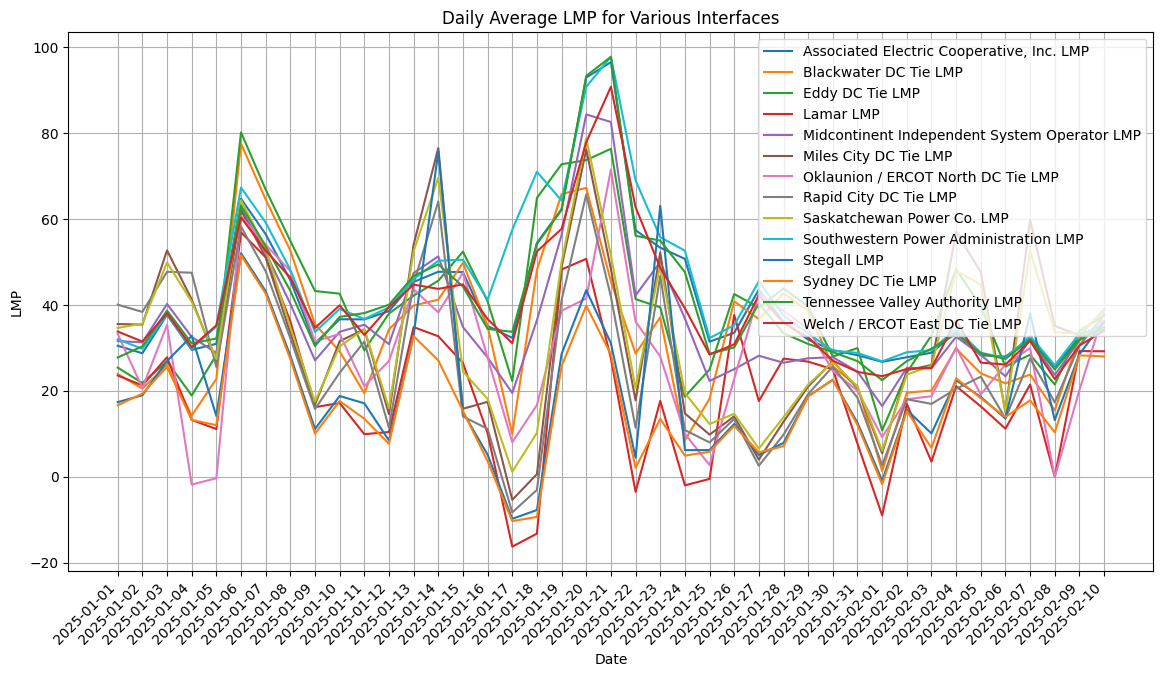

In [8]:
# Resample the data by day and calculate the mean for each day
df_daily_interfaces = df_interfaces.resample('D', on='Local Date').mean()

fig, ax = plt.subplots(figsize=(14, 7))

# Plot all columns ending in "LMP" as lines
for column in df_daily_interfaces.columns:
    if column.endswith("LMP"):
        ax.plot(df_daily_interfaces.index, df_daily_interfaces[column], label=column)

ax.set_xlabel("Date")
ax.set_ylabel("LMP")
ax.set_title("Daily Average LMP for Various Interfaces")
ax.legend()
ax.grid(True)

# Set x-ticks to show every date
ax.set_xticks(df_daily_interfaces.index)
ax.set_xticklabels(df_daily_interfaces.index.strftime('%Y-%m-%d'), rotation=45, ha='right')

plt.show()

In [11]:
# Plot all columns ending in "LMP" as lines
for column in df_daily_interfaces.columns:
    if column.endswith("LMP"):
        print(column)

Associated Electric Cooperative, Inc. LMP
Blackwater DC Tie LMP
Eddy DC Tie LMP
Lamar LMP
Midcontinent Independent System Operator LMP
Miles City DC Tie LMP
Oklaunion / ERCOT North DC Tie LMP
Rapid City DC Tie LMP
Saskatchewan Power Co. LMP
Southwestern Power Administration LMP
Stegall LMP
Sydney DC Tie LMP
Tennessee Valley Authority LMP
Welch / ERCOT East DC Tie LMP
